In [2]:
# import necessary libraries
import gym
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create environment
env = gym.make("Taxi-v3")
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
state_size = env.observation_space.n
print("State size: ", state_size)

action_size = env.action_space.n
print("Action size: ", action_size)

State size:  500
Action size:  6


### Actions
    There are 6 discrete deterministic actions:
    - 0: move south
    - 1: move north
    - 2: move east
    - 3: move west
    - 4: pickup passenger
    - 5: drop off passenger

In [ ]:
done = False
env.reset()
env.render()
while not done:
    action = int(input('0/south 1/north 2/east 3/west 4/pickup 5/drop:'))
    new_state, reward, done, info = env.step(action)
    time.sleep(1.0) 
    print(f'S_t+1={new_state}, r_t+1={reward}, done={done}')
    env.render()

In [5]:
def eval_policy(env_, pi_, gamma_, t_max_, episodes_):
    env_.reset()

    v_pi_rep = np.empty(episodes_)
    for e in range(episodes_):
        s_t = env.reset()
        v_pi = 0
        for t in range(t_max_):
            a_t = pi_[s_t]
            s_t, r_t, done, info = env_.step(a_t) 
            v_pi += gamma_**t*r_t
            if done:
                break
        v_pi_rep[e] = v_pi
        env.close()
        
    return np.mean(v_pi_rep), np.min(v_pi_rep), np.max(v_pi_rep), np.std(v_pi_rep)

In [6]:
qtable = np.zeros((500,6)) # Taxi v3
episodes = 1500 # num of training episodes
interactions = 666 # max num of interactions per episode
epsilon = 0.99 # e-greedy
alpha = 0.5 # learning rate 1.
gamma = 0.9 # reward decay rate
hist = [] # evaluation history

# Main Q-learning loop
for episode in range(episodes):
    
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for interact in range(interactions):
        # exploitation vs. exploratin by e-greedy sampling of actions
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(qtable[state,:])
        else:
            action = np.random.randint(0,6)

        # Observe
        new_state, reward, done, info = env.step(action)

        # Update Q-table
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
                
        # Our new state is state
        state = new_state
        
        # Check if terminated
        if done == True: 
            break
    
    if episode % 10 == 0 or episode == 1:
        pi = np.argmax(qtable, axis=1)
        val_mean, val_min, val_max, val_std = eval_policy(env, pi, gamma, interactions, episodes)
        hist.append([episode, val_mean,val_min,val_max,val_std])

env.reset()

388

(151, 5)


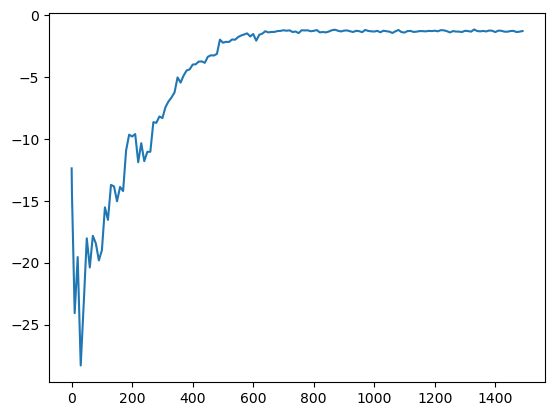

In [7]:
hist = np.array(hist)
print(hist.shape)

plt.plot(hist[:,0],hist[:,1])
plt.show()

(151, 5)


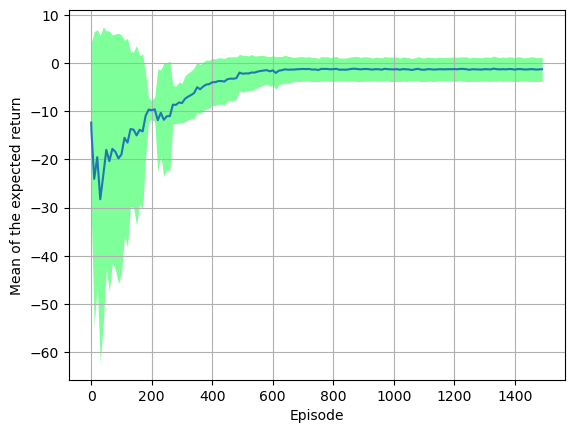

In [8]:
hist = np.array(hist)
print(hist.shape)

plt.plot(hist[:,0],hist[:,1])
# Zero-clipped
#plt.fill_between(hist[:,0], np.maximum(hist[:,1]-hist[:,4],np.zeros(hist.shape[0])),hist[:,1]+hist[:,4],
plt.fill_between(hist[:,0], hist[:,1]-hist[:,4],hist[:,1]+hist[:,4],
                alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99', linewidth=0)

plt.xlabel("Episode")
plt.ylabel("Mean of the expected return")
plt.grid()
plt.show()

In [9]:
qtable

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.59033053,  0.45702927, -0.58978253,  0.45698735,  1.61991653,
        -8.54334802],
       [ 4.3489063 ,  5.94322934,  4.34890637,  5.94322943,  7.71469943,
        -3.05677065],
       ...,
       [ 7.71326728,  9.68230058,  7.71362625,  5.9424221 , -1.2862547 ,
        -1.28768   ],
       [ 1.62261181,  2.91401133,  1.62261292,  2.91401482, -7.37738728,
        -7.37738942],
       [14.28386875, 11.85552861, 14.29402608, 16.99811102,  5.29665134,
         5.29395815]])